# 複数のcsvを時系列順に統合し，一つのcsvファイルとして書き出すプログラム

### 使用方法
- csvのファイル名で昇順並び替えをする．
- 各csvファイルに見出しがある場合はクラスのskiprowsを調整する．


- input_directory に参照したいフォルダパスを入力
- そのフォルダ内に[output]というフォルダを作成
- output_file の引数2に合成したcsvファイルの保存する名前を入力

In [17]:
import pandas as pd
import os
import csv

def combine_csv_files(input_directory, output_file):
    # ファイルのリストを取得
    csv_files = [f for f in os.listdir(input_directory) if f.endswith('.csv')]
    
    # DataFrameのリスト
    df_list = []

    for file in sorted(csv_files):  # ファイル名が連番だと仮定してソート
        file_path = os.path.join(input_directory, file)
        
        # CSVファイルを読み込んで上6行をスキップ
        df = pd.read_csv(file_path, skiprows=6,encoding='shift-jis')
        
        # DataFrameのリストに追加
        df_list.append(df)
    
    # DataFrameを結合
    combined_df = pd.concat(df_list, ignore_index=True)



    # 結合結果をCSVとして保存
    combined_df.to_csv(output_file, index=False,encoding='shift-jis')

    
    ###########################
    # 以下，csvの見出しの1行目を消すため，書き出したCSVを修正
    rows = []
    with open(output_file, encoding="cp932") as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            # １行目（見出し）は飛ばす
            if csv_reader.line_num == 1:
                continue
            rows.append(row)

    # CSV書き込み
    with open(
        output_file, "w", newline="", encoding="cp932"
    ) as csv_file:
        csv_writer = csv.writer(csv_file)
        for row in rows:
            csv_writer.writerow(row)
    ############################


input_directory = os.path.join('./kurashiki')
output_file = os.path.join(input_directory+'/output', 'combined_output.csv')

combine_csv_files(input_directory, output_file)

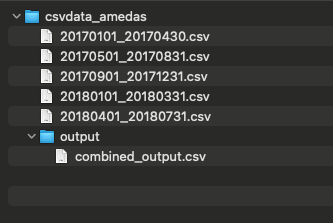

イメージ

# datetime型indexに加工，Pickle保存


In [18]:
import pandas as pd
import os 

# CSVファイルのパス
csv_file_path = output_file
output_path = './kurashiki/output/weather_exo.pickle'

# CSVデータを読み込む（例: 'data.csv' というファイル名を使用）
df = pd.read_csv(csv_file_path, header=None, encoding='shift-jis')

# 列名を設定する
# 年,月,日,時,降水量(mm),降水量(mm),気温(℃),気温(℃),風速(m/s),風速(m/s),風速(m/s)
df.columns = ['year', 'month', 'day', 'hour', 'prec', 'value2', 'temp', 'value4', 'wind', 'value6', 'flag']



# datetime型のインデックスを作成
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

# 不要な列を削除
df.drop(['year', 'month', 'day', 'hour','value2', 'value4', 'value6', 'flag'], axis=1, inplace=True)

# pickleで保存
df.to_pickle(output_path)

# Load from pickle

                     prec  temp  wind
datetime                             
2015-09-01 01:00:00   1.0  22.0   0.0
2015-09-01 02:00:00   5.5  21.8   1.3
2015-09-01 03:00:00   1.5  21.9   2.4
2015-09-01 04:00:00   0.0  22.1   1.6
2015-09-01 05:00:00   0.0  22.3   1.1
...                   ...   ...   ...
2024-08-31 20:00:00   0.0  28.5   2.2
2024-08-31 21:00:00   0.0  27.9   2.2
2024-08-31 22:00:00   0.0  27.0   2.4
2024-08-31 23:00:00   0.0  26.5   1.6
2024-09-01 00:00:00   0.0  26.2   0.7

[78912 rows x 3 columns]


<Axes: title={'center': 'Weather variables in Kurashiki'}, xlabel='datetime'>

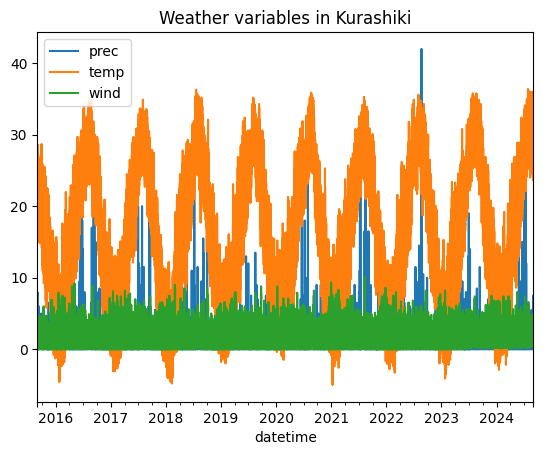

In [22]:
import pandas as pd

# pickleファイルのパス
pickle_file_path = output_path

# pickleデータを読み込む
df_loaded = pd.read_pickle(pickle_file_path)

# 読み込んだデータの表示
print(df_loaded)

df_loaded.plot(title='Weather variables in Kurashiki')

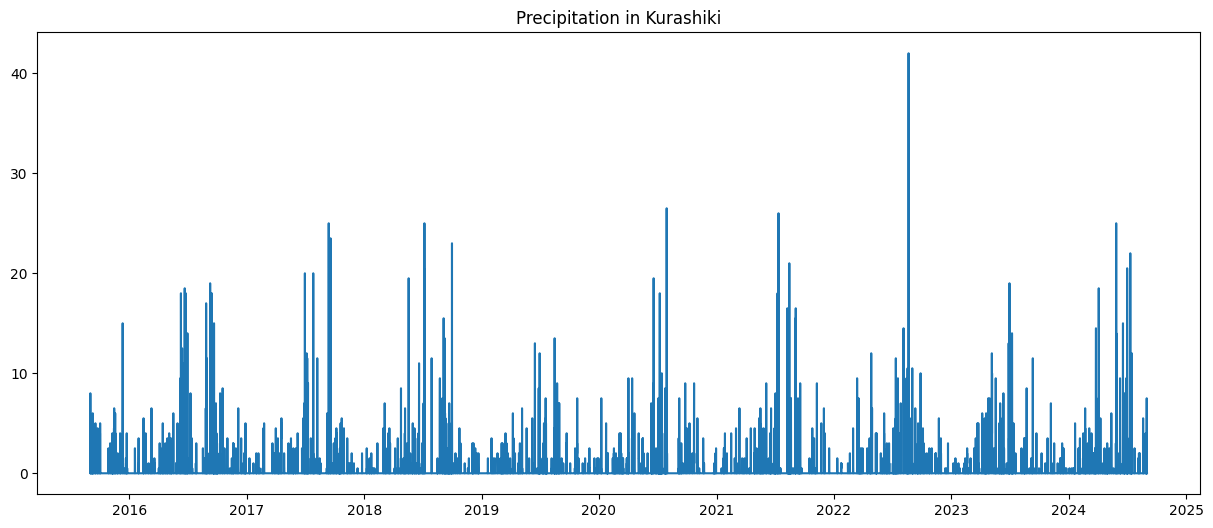

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 図と軸を作成
fig, ax = plt.subplots(figsize=(15,6))

# データを軸にプロット
ax.plot(df_loaded['prec'])

# タイトルを設定
ax.set_title('Precipitation in Kurashiki')

# 横軸のフォーマットを月まで表示するように設定
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # 年-月フォーマットに設定

# グラフを表示
plt.show()

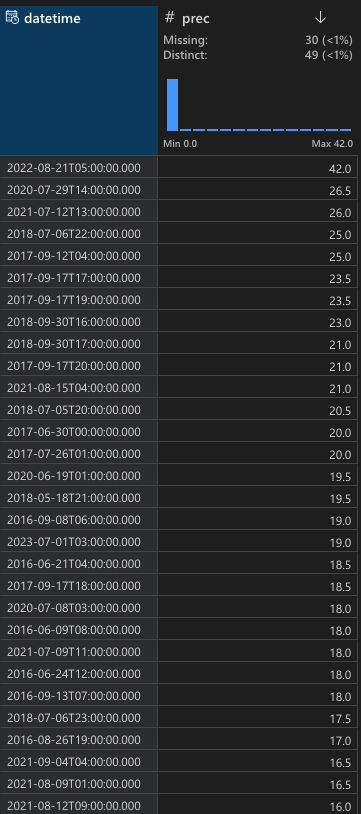